## Calculating the Return of a Portfolio of Securities
#### I downloaded data from Yahoo Finance consisting of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,20.263157,14.737742,19.284641,23.117983,0.853355
2000-01-04,20.155487,14.245313,18.915255,22.452181,0.781409
2000-01-05,20.844570,14.298075,19.946438,21.675432,0.792844
2000-01-06,20.887630,14.315660,20.977625,22.072111,0.724232
2000-01-07,20.500031,15.370867,20.916063,22.631378,0.758538


### Normalization to 100

In [4]:
mydata.iloc[0]

BP      20.263157
F       14.737742
XOM     19.284641
LNC     23.117983
AAPL     0.853355
Name: 2000-01-03 00:00:00, dtype: float64

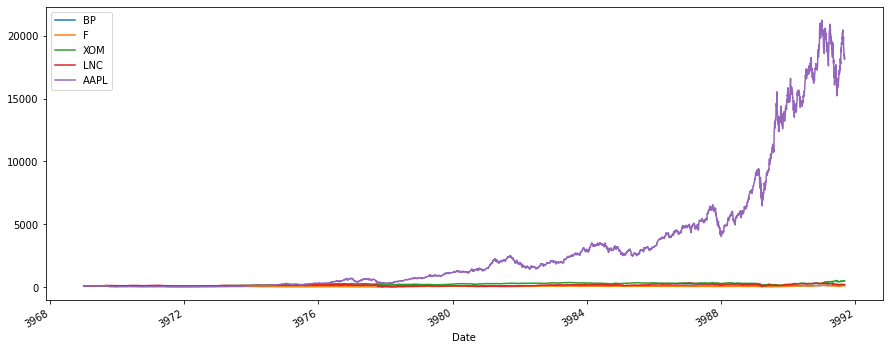

In [5]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [6]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014633
2000-01-06,0.002066,0.001230,0.051698,0.018301,-0.086538
2000-01-07,-0.018556,0.073710,-0.002935,0.025338,0.047369


First, assuming I would like to create an equally-weighted portfolio with the array names “weights”.

In [7]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [8]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.064100
F       0.090874
XOM     0.104449
LNC     0.172564
AAPL    0.310571
dtype: float64

In [9]:
np.dot(annual_returns, weights)

0.14851171435611538

Transform the result into a percentage form. 

In [10]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.851 %
